In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 09 ##

## Prediction ##

In [2]:
galton = Table.read_table('galton.csv')
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [3]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


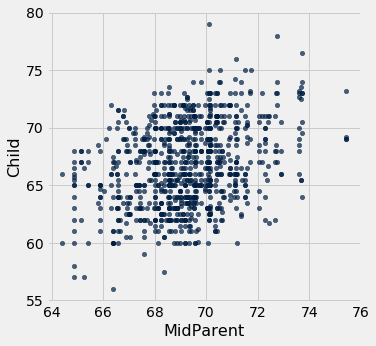

In [4]:
heights.scatter('MidParent', 'Child')

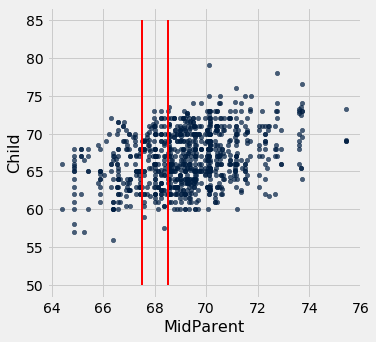

In [5]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [7]:
nearby = heights.where('MidParent', are.between(68-.5, 68+.5))
np.average(nearby.column('Child'))

66.24045801526718

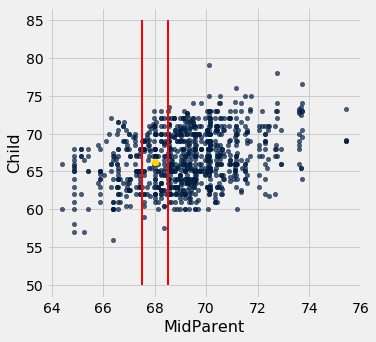

In [8]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=50);

In [9]:
nearby = heights.where('MidParent', are.between(66-.5, 66+.5))
np.average(nearby.column('Child'))

64.349999999999994

In [10]:
def prediction(h):
    nearby = heights.where('MidParent', are.between(h-.5, h+.5))
    return np.average(nearby.column('Child'))

In [12]:
prediction(66)

64.349999999999994

In [14]:
heights = heights.with_column('Predicted Child Height', 
                              heights.apply(prediction, 'MidParent'))
heights

MidParent,Child,Predicted Child Height
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


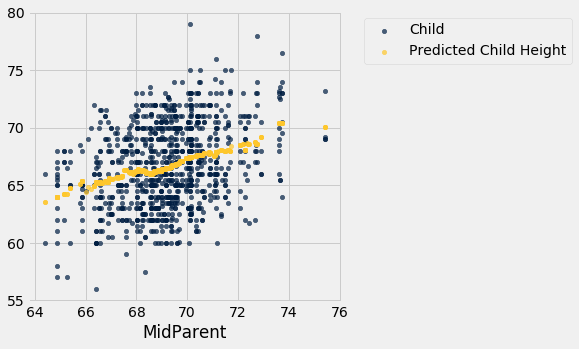

In [15]:
heights.scatter('MidParent')

In [16]:
def prediction_with_width(h, width = .5):
    nearby = heights.where('MidParent', are.between(h-width, h+width))
    return np.average(nearby.column('Child'))

In [19]:
prediction_with_width(68, width = .05)

66.581081081081081

## Apply with Multiple Columns ##

In [20]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [64]:
# difference between each woman's height and her mother's

def difference(mother, child):
    return mother - child

galton.where('gender', 'female').with_column('Diff', galton.where('gender', 'female').apply(difference, 'mother', 'childHeight'))

family,father,mother,midparentHeight,children,childNum,gender,childHeight,Diff
1,78.5,67,75.43,4,2,female,69.2,-2.2
1,78.5,67,75.43,4,3,female,69,-2
1,78.5,67,75.43,4,4,female,69,-2
2,75.5,66.5,73.66,4,3,female,65.5,1
2,75.5,66.5,73.66,4,4,female,65.5,1
3,75,64,72.06,2,2,female,68,-4
4,75,64,72.06,5,3,female,67,-3
4,75,64,72.06,5,4,female,64.5,-0.5
4,75,64,72.06,5,5,female,63,1
5,75,58.5,69.09,6,4,female,66.5,-8


In [61]:
apply(difference, 'mother', 'childHeight'))

SyntaxError: invalid syntax (<ipython-input-61-0109a53ebb63>, line 1)

## Grouping by Category ##

In [23]:
all_cones = Table.read_table('cones.csv')
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [26]:
cones = all_cones.drop(1).exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [27]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [28]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.5499999999999998, 5.25]"


In [66]:
cones.group('Flavor', np.average)

Flavor,Price average
chocolate,5.08333
strawberry,4.4


In [31]:
cones.group('Flavor', len)

Flavor,Price len
chocolate,3
strawberry,2


In [33]:
all_cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4


In [34]:
def spread(x):
    return max(x) - min(x)

cones.group('Flavor', spread)

Flavor,Price spread
chocolate,0.5
strawberry,1.7


In [35]:
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [36]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [37]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [38]:
all_cones.group(['Flavor', 'Color'], np.average)

Flavor,Color,Price average
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


In [39]:
all_cones.group(['Flavor', 'Color'], np.min)

Flavor,Color,Price amin
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


## Examples ##

In [40]:
nba = Table.read_table('nba_20172018_salaries.csv')
nba

Player,Position,Team,Salary
Stephen Curry,PG,Golden State Warriors,34.3826
LeBron James,SF,Cleveland Cavaliers,33.2857
Paul Millsap,PF,Denver Nuggets,31.2692
Blake Griffin,PF,Detroit Pistons,29.7279
Gordon Hayward,SF,Boston Celtics,29.7279
Kyle Lowry,PG,Toronto Raptors,28.7037
Mike Conley,PG,Memphis Grizzlies,28.5306
Russell Westbrook,PG,Oklahoma City Thunder,28.5306
James Harden,PG,Houston Rockets,28.2994
DeMar DeRozan,SG,Toronto Raptors,27.74


In [42]:
# total salary paid by each team, highest first

nba.select('Team', 'Salary').group('Team', sum).sort(1, descending = True)

Team,Salary sum
Cleveland Cavaliers,139.483
Oklahoma City Thunder,134.993
Portland Trail Blazers,134.691
Philadelphia 76ers,131.137
Golden State Warriors,126.159
Washington Wizards,124.402
Charlotte Hornets,121.825
Toronto Raptors,118.44
San Antonio Spurs,117.922
Utah Jazz,115.379


In [45]:
nba.group('Team', sum).sort('Salary sum', descending = True)

Team,Player sum,Position sum,Salary sum
Cleveland Cavaliers,,,139.483
Oklahoma City Thunder,,,134.993
Portland Trail Blazers,,,134.691
Philadelphia 76ers,,,131.137
Golden State Warriors,,,126.159
Washington Wizards,,,124.402
Charlotte Hornets,,,121.825
Toronto Raptors,,,118.44
San Antonio Spurs,,,117.922
Utah Jazz,,,115.379


In [46]:
# average salary paid for each position


nba.select('Salary', 'Position').group('Position', np.average)

Position,Salary average
C,8.11203
PF,6.28895
PG,6.90524
SF,6.77369
SG,5.47024


In [52]:
# for each team, average salary paid for each position
nba.drop('Player').group(['Team', 'Position'], np.average).show()

Team,Position,Salary average
Atlanta Hawks,C,9.25
Atlanta Hawks,PF,1.94751
Atlanta Hawks,PG,5.07326
Atlanta Hawks,SF,1.69344
Atlanta Hawks,SG,2.90409
Boston Celtics,C,4.328
Boston Celtics,PF,6.52657
Boston Celtics,PG,6.35992
Boston Celtics,SF,12.1802
Boston Celtics,SG,2.88605


## Pivot Tables ##

In [53]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [54]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [55]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [56]:
all_cones.pivot('Flavor', 'Color', 'Price', np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


## Examples ##

In [60]:
# for each team, average salary paid for each position

nba.pivot('Team', 'Position', 'Salary', np.average)

Position,Atlanta Hawks,Boston Celtics,Brooklyn Nets,Charlotte Hornets,Chicago Bulls,Cleveland Cavaliers,Dallas Mavericks,Denver Nuggets,Detroit Pistons,Golden State Warriors,Houston Rockets,Indiana Pacers,LA Clippers,Los Angeles Lakers,Memphis Grizzlies,Miami Heat,Milwaukee Bucks,Minnesota Timberwolves,New Orleans Pelicans,New York Knicks,Oklahoma City Thunder,Orlando Magic,Philadelphia 76ers,Phoenix Suns,Portland Trail Blazers,Sacramento Kings,San Antonio Spurs,Toronto Raptors,Utah Jazz,Washington Wizards,nan
C,9.25,4.328,6.23442,9.39679,10.7392,19.5212,4.94199,7.75624,23.7755,3.4776,2.90606,3.56278,22.6424,11.9776,11.9775,2.49036,7.05335,7.66278,7.87256,10.2717,22.4719,14.625,5.28573,6.9539,4.85789,4.09419,7.97269,6.05841,7.00401,14.7221,0
PF,1.94751,6.52657,5.5,5.63033,5.94599,0.926461,6.02118,8.39051,9.40707,16.4,11.4342,8.51235,0,4.33124,2.55527,8.12607,9.5901,8.975,8.67669,2.74202,10.9873,3.55706,4.18094,3.63957,4.31339,4.08858,11.0022,20.0617,7.59871,3.9112,0
PG,5.07326,6.35992,7.3034,2.95075,2.79156,15.7812,1.81737,3.31746,6.05933,14.0299,11.1022,8.21,7.7795,6.27398,7.61383,17.0005,3.93286,9.64548,14.4933,2.55559,28.5306,6.125,7.39836,6.52473,9.58144,1.82937,9.19067,10.1218,5.19582,5.43992,0.874636
SF,1.69344,12.1802,5.08346,4.87708,2.1864,17.9643,23.112,4.26565,3.0978,19.9074,7.50547,5.63933,5.51997,7.71443,6.97651,2.70504,7.48732,7.57432,5.91919,5.04022,6.67005,3.03362,16.6981,6.57647,13.647,3.97241,7.65379,2.24122,6.81733,13.4331,0
SG,2.90409,2.88605,7.70933,5.83516,2.84233,10.3657,5.28442,2.58357,3.97532,6.09431,4.95561,9.48283,7.90449,9.57021,1.62564,7.71709,3.76379,10.4392,0.05819,4.42984,6.08716,7.36454,5.81851,3.70448,7.12064,7.02925,4.6042,7.58287,4.08187,13.3878,0


In [ ]:
# for each team,
# amount paid to "starter" (player earning the most) in each position



In [ ]:
# sort teams by total amount paid to starters

